# 스트레스 원인 전처리

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# windows용 한글 폰트 오류 해결
from matplotlib import font_manager, rc 
font_path = "C:/Windows/Fonts/malgun.ttf" # 맑음보통체
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc("font", family = font_name)

In [5]:
df = pd.read_csv("./data/스트레스빈도와원인전처리.csv",usecols=range(1,13))

In [6]:
df.head()

,기준,남여,사람수,내가하는일,일거리 부족/실직,가족 문제,건강 문제,돈부족 경제적문제,"이사, 이직 등 생활변화",환경 재난,세계에서 벌어지는 전쟁,모름 응답거절
0,전체,전체,1029,0.26,0.08,0.17,0.08,0.29,0.03,0.02,0.04,0.03
1,성별,남성,518,0.29,0.09,0.13,0.05,0.31,0.02,0.02,0.05,0.04
2,성별,여성,511,0.24,0.07,0.21,0.11,0.27,0.04,0.02,0.03,0.01
3,연령별,20대,162,0.42,0.15,0.09,0.01,0.25,0.03,0,0.02,0.03
4,연령별,30대,167,0.35,0.06,0.12,0.06,0.33,0.04,0.01,0.02,0.01


In [7]:
# 연령별로 나눈 솔루션을 마련하기 위함

In [8]:
age_filter_df = df[df["기준"] == "연령별"]

In [9]:
age_filter_df = age_filter_df.reset_index(drop=True)

In [10]:
age_filter_df

,기준,남여,사람수,내가하는일,일거리 부족/실직,가족 문제,건강 문제,돈부족 경제적문제,"이사, 이직 등 생활변화",환경 재난,세계에서 벌어지는 전쟁,모름 응답거절
0,연령별,20대,162,0.42,0.15,0.09,0.01,0.25,0.03,0,0.02,0.03
1,연령별,30대,167,0.35,0.06,0.12,0.06,0.33,0.04,0.01,0.02,0.01
2,연령별,40대,196,0.26,0.06,0.21,0.06,0.32,0.05,0.02,0,0.03
3,연령별,50대,213,0.25,0.07,0.19,0.07,0.32,0.01,0.02,0.05,0.02
4,연령별,60대이상,290,0.15,0.07,0.21,0.15,0.25,0.02,0.03,0.09,0.03
5,연령별,남성 30대,88,35%,7%,12%,4%,37%,0.03,2%,0.02,2%
6,연령별,남성 40대,100,29%,7%,11%,3%,36%,0.03,4%,0.02,6%


In [11]:
# 20대 스트레스 요인 1위 부터 3위 뽑기
s_20 = age_filter_df[age_filter_df["남여"] == "20대"].loc[:,"내가하는일":"세계에서 벌어지는 전쟁"].max().sort_values(ascending = False).head(3)

In [12]:
# 30대 스트레스 요인 1위 부터 3위 뽑기
s_30 =  age_filter_df[age_filter_df["남여"] == "30대"].loc[:,"내가하는일":"세계에서 벌어지는 전쟁"].max().sort_values(ascending = False).head(3)

In [13]:
# 40대 스트레스 요인 1위 부터 3위 뽑기
s_40 = age_filter_df[age_filter_df["남여"] == "40대"].loc[:,"내가하는일":"세계에서 벌어지는 전쟁"].max().sort_values(ascending = False).head(3)

In [14]:
# 50대 스트레스 요인 1위 부터 3위 뽑기
s_50 = age_filter_df[age_filter_df["남여"] == "50대"].loc[:,"내가하는일":"세계에서 벌어지는 전쟁"].max().sort_values(ascending = False).head(3)

In [15]:
# 50대 스트레스 요인 1위 부터 3위 뽑기
s_60 = age_filter_df[age_filter_df["남여"] == "60대이상"].loc[:,"내가하는일":"세계에서 벌어지는 전쟁"].max().sort_values(ascending = False).head(3)


     1위 2위 3위
10대 
20대
30대
40대
50대
60대이상

In [16]:
final_df = pd.DataFrame(
    {
        "순위" : [1,2,3],
        "20대" : s_20.index.to_list(),
        "20대_값" : s_20.to_list(),
        "30대" : s_30.index.to_list(),
        "30대_값" : s_30.to_list(),
        "40대" : s_40.index.to_list(),
        "40대_값" : s_40.to_list(),
        "50대" : s_50.index.to_list(),
        "50대_값" : s_50.to_list(),
        "60대이상" : s_60.index.to_list(),
        "60대_값" : s_60.to_list(),
    }
)

In [17]:
final_df = final_df.set_index("순위")

In [18]:
final_df

,20대,20대_값,30대,30대_값,40대,40대_값,50대,50대_값,60대이상,60대_값
순위,,,,,,,,,,
1,내가하는일,0.42,내가하는일,0.35,돈부족 경제적문제,0.32,돈부족 경제적문제,0.32,돈부족 경제적문제,0.25
2,돈부족 경제적문제,0.25,돈부족 경제적문제,0.33,내가하는일,0.26,내가하는일,0.25,가족 문제,0.21
3,일거리 부족/실직,0.15,가족 문제,0.12,가족 문제,0.21,가족 문제,0.19,내가하는일,0.15


In [19]:
final_df.dtypes

20대      object
20대_값    object
30대      object
30대_값    object
40대      object
40대_값    object
50대      object
50대_값    object
60대이상    object
60대_값    object
dtype: object

In [20]:
chart_values = final_df[["20대_값","30대_값","40대_값","50대_값","60대_값"]].astype(float)

# 시각화 그래프

In [21]:
# 비중그래프를 그리는게 좋아뵘
pie_1st_values = (chart_values.loc[1, :]*100).astype(int).to_list()
print(pie_1st_values)
print(len(pie_1st_values))

[42, 35, 32, 32, 25]
5


In [22]:
chart_values

,20대_값,30대_값,40대_값,50대_값,60대_값
순위,,,,,
1,0.42,0.35,0.32,0.32,0.25
2,0.25,0.33,0.26,0.25,0.21
3,0.15,0.12,0.21,0.19,0.15


In [23]:
stress_20_list = final_df["20대"].values.tolist()
stress_20_value_list = (chart_values.loc[:, "20대_값"]*100).astype(int).to_list()

stress_30_list = final_df["30대"].values.tolist()
stress_30_value_list = (chart_values.loc[:, "30대_값"]*100).astype(int).to_list()

stress_40_list = final_df["40대"].values.tolist()
stress_40_value_list = (chart_values.loc[:, "40대_값"]*100).astype(int).to_list()

stress_50_list = final_df["50대"].values.tolist()
stress_50_value_list = (chart_values.loc[:, "50대_값"]*100).astype(int).to_list()


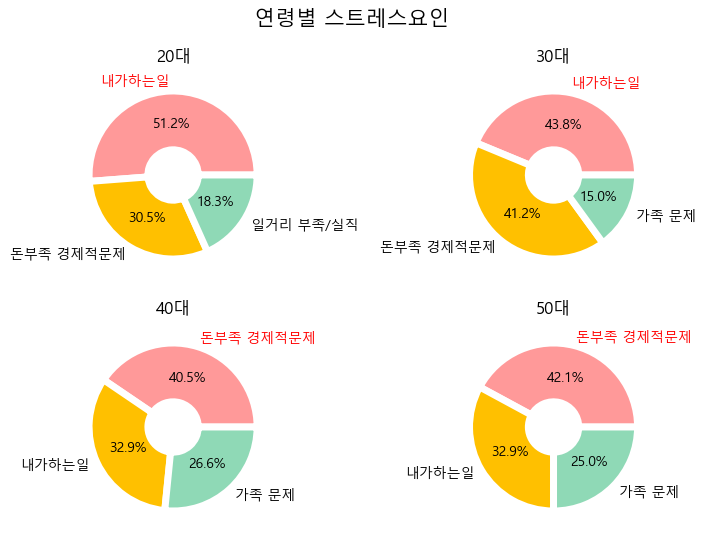

In [27]:
fig = plt.figure(figsize=(9,6))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ratio1 = stress_20_value_list
labels1 = stress_20_list

ratio2 = stress_30_value_list
labels2 = stress_30_list

ratio3 = stress_40_value_list
labels3 = stress_40_list

ratio4 = stress_50_value_list
labels4 = stress_50_list


colors = ['#ff9999', '#ffc000', '#8fd9b6']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

ax1.set_title('20대')
ax2.set_title('30대')
ax3.set_title('40대')
ax4.set_title('50대')

patches1, texts1, pcts1 = ax1.pie(
    ratio1, 
    labels=labels1, 
    autopct='%.1f%%', 
    colors=colors, 
    wedgeprops=wedgeprops,
)

patches2, texts2, pcts2 = ax2.pie(
    ratio2, 
    labels=labels2, 
    autopct='%.1f%%', 
    colors=colors, 
    wedgeprops=wedgeprops,
)

patches3, texts3, pcts3 = ax3.pie(
    ratio3, 
    labels=labels3, 
    autopct='%.1f%%', 
    colors=colors, 
    wedgeprops=wedgeprops,
)

patches4, texts4, pcts4 = ax4.pie(
    ratio4, 
    labels=labels4, 
    autopct='%.1f%%', 
    colors=colors, 
    wedgeprops=wedgeprops,
)

# for i, patch in enumerate(ax1):
#   texts[i].set_color(patch.get_facecolor())

texts1[0].set_color("red")
texts2[0].set_color("red")
texts3[0].set_color("red")
texts4[0].set_color("red")


plt.suptitle("연령별 스트레스요인", fontsize=15)
plt.savefig('stress_age.pdf', transparent = True)

plt.show()

### 결과 분석
- 20대 와 30대의 스트레스 주요 원인은 내가하고있는일이며 이는 회사생활, 사업, 공부등 여러 자신이 하고자 하는 일을 중요시 여기고 있기 때문에 더욱 스트레스를 받는것으로 나타남
- 20대 이후로 돈과 가족문제에 대한 스트레스의 비중이 높아지는것으로 보아 결혼, 자녀문제 또는 부모의 부양등의 이유로 돈의 필요성이 증가되는 것으로 보임
- 사람이 나이가 많아질수록 돈, 경제적인 문제가 스트레스 요인으로 크게 작용함

# 키워드 도출